# Introducción a la Inteligencia Artificial

## CLASE 3

## Referencias

- [Cheatsheet de Latex](https://www.caam.rice.edu/~heinken/latex/symbols.pdf)
- [DRIVE](https://drive.google.com/drive/folders/1TDRvlwfSgLI39gHXgVhWlSaRJ-aTSaDE?usp=sharing)

## Comentarios sobre el estado del documento



## Importar librerías

In [10]:
import time

import numpy as np
import matplotlib.pyplot as plt
import os

from sklearn.model_selection import train_test_split

# MATPLOTLIB & SNS
# from mpl_toolkits import mplot3d
# from matplotlib import cm
# from matplotlib_venn import venn2
# import seaborn as sns

# MATH & RANDOM
# import math
# import numpy.random as random
# import scipy.stats as stats
# random.seed(42)

#PANDAS
# import pandas as pd

# %matplotlib inline

In [207]:
# Ejercicio donde vamos a computar el gradiente descendente

#1) plantear W
#2) calcualr error
#3) caluclar función costo
#4) calcular el gradiente de la función costo para ese W
#5) mejorar el W restando alpha por el gradiente

FILE_PATH = "C:/Users/jota_/00_Especialización_IA/00_Recursos/01_DataSets/income.data.csv"


class Data(object):

    def __init__(self, path):
        self.dataset = self._build_dataset(path)

    def split(self, percentage):
        # divides the dataset by permutating, masking and slicing into train and split
        SIZE = self.dataset.shape[0]
        data_total = self.dataset
        idx = np.arange(0, SIZE)
        
        # permutate
        perm_idx = np.random.permutation(idx)
        
        # generate index slice
        train_idx = perm_idx[:int(SIZE * percentage)]
        test_idx = perm_idx[int(SIZE * percentage):]
        
        # slice dataset
        train_data = data_total[train_idx]
        test_data = data_total[test_idx]
        
        def vector_creator(vector, dataset):
            x = dataset[vector].reshape(dataset[vector].shape[0], 1)
            return x
        
        X_train = vector_creator('X', train_data)
        y_train = vector_creator('y', train_data)
        X_test = vector_creator('X', test_data)
        y_test = vector_creator('y', test_data)

        return X_train, y_train, X_test, y_test

    def _build_dataset(self, path):
        ## creates structured array
        structure = [('X', np.float32), ('y', np.float32)]
        structure = np.dtype(structure)
        # load numpy array from disk using a generator
        with open(path, encoding="utf8") as file:
                    data_gen = ((line.split(',')[1], line.split(',')[2]) 
                                for line in file if not line.split(',')[1][2].isalpha())
                    data_total = np.fromiter(data_gen, structure)
        
        return data_total


class BaseModel(object):

    def __init__(self):
        self.model = None

    def fit(self, X, Y):
        return NotImplemented

    def predict(self, X):
        return NotImplemented    


    
class ConstantModel(BaseModel):

    def fit(self, X, Y):
        W = Y.mean()
        self.model = W

    def predict(self, X):
        return np.ones(len(X)) * self.model
    
    
class LinearRegression(BaseModel):

    def fit(self, X, y):
        if len(X.shape) == 1:
            W = X.T.dot(y) / X.T.dot(X)
        else:
            W = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
        self.model = W

    def predict(self, X):
        return self.model * X


class LinearRegressionWithB(BaseModel):

    def fit(self, X, y):
        X_expanded = np.vstack((X.T, np.ones(len(X)).reshape(1,len(X)))).T
        W = np.linalg.inv(X_expanded.T.dot(X_expanded)).dot(X_expanded.T).dot(y)
        self.model = W

    def predict(self, X):
        X_expanded = np.vstack((X.T, np.ones(len(X)).reshape(1,len(X)))).T
        return X_expanded.dot(self.model)

    

        

def gradient_descent(X, y, alpha=0.01, epochs=100):
        
        n = X.shape[0]
        m = X.shape[1]
        
        W = np.random.randint(-0, 10, size=[m,1])
        
        for i in range(epochs):
            prediction = np.matmul(X, W)
            
            error = y - prediction
            
            grad_sum = np.sum(error * X, axis=0)
            grad_mul = -2/n * grad_sum
            gradient = grad_mul.T.reshape(-1,1)

            W = W - (alpha * gradient)
            
        return W
    
    
def gradient_stochastic(X, y, alpha=0.01, epochs=100):
        
        n = X.shape[0]
        m = X.shape[1]
        
        W = np.random.randint(-100, 100, size=[m,1])
        
        for i in range(epochs):
            
            idx = np.random.permutation(n)
            X = X[idx]
            y = y[idx]
            
            for j in range(n):
                prediction = np.matmul(X[j,:], W)

                error = y[j] - prediction

                grad_sum = error * X[j,:]
                grad_mul = -2/n * grad_sum
                gradient = grad_mul.T.reshape(-1,1)
                
                W = W - (alpha * gradient)
            
        return W
    
def mini_batch_gradient_descent(X, y, alpha=0.01, epochs=100, b=15):

    n = X.shape[0]
    m = X.shape[1]


    W = np.random.randint(-100, 100, size=[m,1])

    for i in range(epochs):

        idx = np.random.permutation(n)
        X = X[idx]
        y = y[idx]
        
        batch_size = int(n/b)

        for j in range(0, n, batch_size):
            end_batch = j + batch_size if batch_size + j <= n else n
            
            X_batch = X[j:end_batch,:]
            y_batch = y[j:end_batch,:]
            
            prediction = np.matmul(X_batch, W)

            error = y_batch - prediction

            grad_sum = np.sum(error * X_batch, axis = 0)
            grad_mul = -2/n * grad_sum
            gradient = grad_mul.T.reshape(-1,1)

            W = W - (alpha * gradient)

    return W
    
def adapt_data_order(X, order):
    """
    Toma un dataset X, devuelve el dataset que corresponde a un polinomio de orden 'orden'.
    Cada columna del dataset devuelto corresponde a X^i, con i creciente hasta orden.
    NO TIENE EN CUENTA EL ORDEN 0!
    
    In:
    ndarray
    
    Out:
    ndarray
    """
    X_repeat_order = np.repeat(X, order, axis = 1)
    orders = np.array(range(1, order +1))
    X_order = np.apply_along_axis(np.power, 0, X_repeat_order.T, orders).T
    
    return X_order



In [4]:
income_happi = Data(FILE_PATH)
X_train, y_train, X_test, y_test = income_happi.split(0.8)

X_train.shape
adapt_data_order(X_train, 6)


array([[4.19067240e+00, 1.75617351e+01, 7.35954787e+01, 3.08414541e+02,
        1.29246431e+03, 5.41629449e+03],
       [4.19300747e+00, 1.75813116e+01, 7.37185710e+01, 3.09102519e+02,
        1.29606917e+03, 5.43442771e+03],
       [4.92395687e+00, 2.42453513e+01, 1.19383064e+02, 5.87837058e+02,
        2.89448432e+03, 1.42523160e+04],
       ...,
       [3.22139359e+00, 1.03773766e+01, 3.34296145e+01, 1.07689946e+02,
        3.46911700e+02, 1.11753913e+03],
       [2.91704869e+00, 8.50917308e+00, 2.48216722e+01, 7.24060264e+01,
        2.11211905e+02, 6.16115411e+02],
       [2.76371980e+00, 7.63814712e+00, 2.11096984e+01, 5.83412914e+01,
        1.61238982e+02, 4.45619367e+02]])

Time that took gradient descent for order 1 : 1.8705551624298096
Time that took gradient stochastic for order 1 : 330.62744760513306
Time that took gradient minibatch for order 1 : 32.49903988838196 


Report of Order 1: 
 
 The paraemters for Analytical Linreg are [[0.72105855]
 [0.15885782]] 
 The parameters for gradient descent are [[0.15885782]
 [0.72105855]] 

Time that took gradient descent for order 2 : 3.2367117404937744
Time that took gradient stochastic for order 2 : 327.13821268081665
Time that took gradient minibatch for order 2 : 32.19164514541626 


Report of Order 2: 
 
 The paraemters for Analytical Linreg are [[ 0.76689123]
 [-0.00509154]
 [ 0.07130941]] 
 The parameters for gradient descent are [[0.21395949]
 [0.69863909]
 [0.00206515]] 



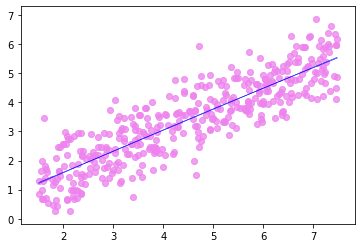

In [210]:
orders = 3
LinReg = LinearRegressionWithB()

for i in range(1, orders):
    X = adapt_data_order(X_train, i)
    
    LinReg.fit(X, y_train)
    
    train_ids = X.argsort(axis=0)[:,0]
    plt.scatter(X_train, y_train, alpha=0.5, c='violet')
    plt.plot(X_train[train_ids], LinReg.predict(X)[train_ids], color='blue', linewidth = 0.5)
    
    seconds_1 = time.time()
    X_expanded = np.vstack((np.ones(len(X)).reshape(1,len(X)), X.T)).T
    W_gradient_descent = gradient_descent(X_expanded, y_train, epochs=100000, alpha=0.001)
    seconds_2 = time.time()
    print('Time that took gradient descent for order {} : {}'.format(i, seconds_2-seconds_1))
    
    W_gradient_stochastic = gradient_stochastic(X_expanded, y_train, epochs=100000, alpha=0.001)
    seconds_3 = time.time()
    print('Time that took gradient stochastic for order {} : {}'.format(i, seconds_3-seconds_2)) 
        
    W_gradient_minibatch = mini_batch_gradient_descent(X_expanded, y_train, epochs=100000, alpha=0.001)
    seconds_4 = time.time()
    print('Time that took gradient minibatch for order {} : {} \n\n'.format(i, seconds_4-seconds_3)) 
    
    
    print('Report of Order {}: \n \n The paraemters for Analytical Linreg are {} \n The parameters for gradient descent are {} \n'.format(i, LinReg.model, W_gradient_descent)) 
                                                                

plt.show()
    
    
    
    

In [206]:
X = X_expanded
W = np.ones([X.shape[1],1])
epochs = 100000

y = y_train
alpha = 0.001

n = X.shape[0]
m = X.shape[1]

W = np.random.randn(m).reshape(m, 1)

for i in range(epochs):
    prediction = np.matmul(X, W)

    error = y - prediction

    grad_sum = np.sum(error * X, axis=0)
    grad_mul = -2/n * grad_sum
    gradient = grad_mul.T.reshape(-1,1)

    W = W - (alpha * gradient)
    
print(W)

[[ 0.00702845]
 [ 0.797647  ]
 [-0.00831649]]


In [68]:
np.sum(error * X, axis = 0)

array([  -533019.63922584,  -3024220.11569182, -18216929.15867875])

In [185]:
X_expanded[:,1].reshape(-1,1).shape

(398, 1)